https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/

In [1]:
from IPython.display import clear_output

!pip install torch torchvision
!pip install opencv-contrib-python
!pip install scikit-learn
clear_output()

In [2]:
# import the necessary packages
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten

Module: Ao invés de usar Sequential, utilizaremos uma subclasse de Module para  
mostrar como funciona a implementação de NNs com classes

Conv2D: implementação do PyTorch das camadas convolucionais

Linear: camadas fully connected

MaxPool2D: Redução de dimensão espacial com max-pooling

ReLU: Função de ativação ReLU

In [4]:
class LeNet(Module):
    def __init__(self, numChannels, classes):
        super(LeNet, self).__init__()

        # Primeiro conjunto de camadas
        # CONV => RELU => POOL
        self.conv1 = Conv2d(in_channels=numChannels, out_channels=20, kernel_size=(5, 5))
        self.relu1 = ReLU()
        self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # Segundo conjunto de camadas
        # CONV => RELU => POOL
        self.conv2 = Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5)) # pq 50 out channels?
        self.relu2 = ReLU()
        self.maxpool2 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # Camadas FC => RELU
        self.fc1 = Linear(in_features=800, out_features=500) # por que esses valores? Qual o cálculo?
        self.relu3 = ReLU()

        # classificador softmax
        self.fc2 = Linear(in_features=500, out_features=classes)
        self.logSoftmax = LogSoftmax(dim=1)

```py
def __init__(self, numChannels, classes):
```
`numChannels`: Número de canais nas imagens de entrada (1 para cinza ou 3 para RGB)  
`classes`: Número de labels únicos no dataset

```py
self.conv1 = Conv2d(in_channels=numChannels, out_channels=20, kernel_size=(5, 5))
self.relu1 = ReLU()
self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
```  
Inicializa o primeiro conjunto de camadas `CONV => RELU => POOL`  
- A primeira camada CONV aprende um total de 20 filtros, cada um de dimensão 5x5  
- A função de ativação ReLU é aplicada
- Seguido por uma camada 2x2 de max-pooling com 2x2 de stride  
para reduzir as dimensões espaciais da imagem de entrada


```py
self.conv2 = Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5))
self.relu2 = ReLU()
self.maxpool2 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
```

Inicializa o segundo conjunto de camadas `CONV => RELU => POOL`
- Acrescenta o número de filtros aprendidos na camada CONV para 50 (arbitrário), mantendo a dimensão 5x5
- Aplica novamente a função de ativação ReLU
- Seguido por max pooling e stride 2x2

```py
self.fc1 = Linear(in_features=800, out_features=500) # por que esses valores? Qual o cálculo?
self.relu3 = ReLU()
```

Inicializa o conjunto de camada fully connected seguido da função de ativação ReLU
- Em `in_features`, o valor é determinado pela dimensionalidade do tensor de saída  
da última camada convolucional (após as operações de pooling).  
Como será utilizado imagens de entrada 28x28 (do MNIST), o cálculo é feito da forma:
    - Após a primeira convolução (kernel 5x5 sem padding), a dimensão passa de 28 para 24  
    $(28 - 5 + 1 = 24)$
    - Após o primeiro max pooling com kernel 2x2, a dimensão se reduz para 12 $(24/2)$
    - Na segunda convolução (kernel 5x5), a dimensão passa de 12 para 8 $(12 - 5 + 1 = 8)$
    - Após o segundo max pooling (2x2), a dimensão se reduz para 4 $(8/2)$
    - Se a segunda camada convolucional gera 50 mapas de ativação (filtros), o tamanho total  
    será: $50 \text{ (canais)} * 4 \text{ (altura)} * 4 \text{ (largura)} = 800$
- Em `out_features`, o valor é escolhido como parte do design da arquitetura da rede

```py
self.fc2 = Linear(in_features=500, out_features=classes)
self.logSoftmax = LogSoftmax(dim=1)
```

Última camada que fará a classificação
- Classificador fully connected com função de ativação Softmax
- `in_features` é igual a `500` pois é a saída da camada anterior

In [5]:
class LeNet(Module):
    def __init__(self, numChannels, classes):
        super(LeNet, self).__init__()

        self.conv1 = Conv2d(in_channels=numChannels, out_channels=20, kernel_size=(5, 5))
        self.relu1 = ReLU()
        self.maxpool1 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        self.conv2 = Conv2d(in_channels=20, out_channels=50, kernel_size=(5, 5))
        self.relu2 = ReLU()
        self.maxpool2 = MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        self.fc1 = Linear(in_features=800, out_features=500)
        self.relu3 = ReLU()

        self.fc2 = Linear(in_features=500, out_features=classes)
        self.logSoftmax = LogSoftmax(dim=1)

    def forward(self, x):
        # Primeira camada de convolução
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        # Segunda camada de convolução
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        # Camadas FC
        x = flatten(x, 1)
        x = self.fc1(x)
        x = self.relu3(x)

        # Classificador softmax
        x = self.fc2(x)
        output = self.logSoftmax(x)

        return output

```python
def forward(self, x):
```
Recebe um vetor de entrada x e é responsável por:  
- Conectar camadas / subredes das variáveis definidas no construtor  
- Define a arquitetura da rede  
- Faz o processo de passar os dados pelo modelo, resultando no output  
- Tem integração com o módulo autograd do PyTorch, "allows us to perform automatic  
differentiation and update our model weights"

In [6]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import argparse
import torch
import time

In [7]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10
# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# load the KMNIST dataset
print("[INFO] loading the KMNIST dataset...")
trainData = KMNIST(root="data", train=True, download=True,
	transform=ToTensor())
testData = KMNIST(root="data", train=False, download=True,
	transform=ToTensor())
# calculate the train/validation split
print("[INFO] generating the train/validation split...")
numTrainSamples = int(len(trainData) * TRAIN_SPLIT)
numValSamples = int(len(trainData) * VAL_SPLIT)
(trainData, valData) = random_split(trainData,
	[numTrainSamples, numValSamples],
	generator=torch.Generator().manual_seed(42))

[INFO] loading the KMNIST dataset...


100%|██████████| 18.2M/18.2M [00:16<00:00, 1.11MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 3.04M/3.04M [00:02<00:00, 1.48MB/s]
100%|██████████| 5.12k/5.12k [00:00<00:00, 5.98MB/s]

[INFO] generating the train/validation split...


In [9]:
# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(trainData, shuffle=True,
	batch_size=BATCH_SIZE)
valDataLoader = DataLoader(valData, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(testData, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE

In [10]:
# initialize the LeNet model
print("[INFO] initializing the LeNet model...")
model = LeNet(
	numChannels=1,
	classes=len(trainData.dataset.classes)).to(device)
# initialize our optimizer and loss function
opt = Adam(model.parameters(), lr=INIT_LR)
lossFn = nn.NLLLoss()
# initialize a dictionary to store training history
H = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}
# measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()

[INFO] initializing the LeNet model...
[INFO] training the network...


In [11]:
# loop over our epochs
for e in tqdm(range(0, EPOCHS), desc='Epochs'):
    # set the model in training mode
    model.train()
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalValLoss = 0
    # initialize the number of correct predictions in the training
    # and validation step
    trainCorrect = 0
    valCorrect = 0
    # loop over the training set
    for (x, y) in tqdm(trainDataLoader, desc='Training', leave=False):
        # send the input to the device
        (x, y) = (x.to(device), y.to(device))
        # perform a forward pass and calculate the training loss
        pred = model(x)
        loss = lossFn(pred, y)
        # zero out the gradients, perform the backpropagation step,
        # and update the weights
        opt.zero_grad()
        loss.backward()
        opt.step()
        # add the loss to the total training loss so far and
        # calculate the number of correct predictions
        totalTrainLoss += loss
        trainCorrect += (pred.argmax(1) == y).type(
            torch.float).sum().item()

    with torch.no_grad():
        # set the model in evaluation mode
        model.eval()
        # loop over the validation set
        for (x, y) in tqdm(valDataLoader, desc='Validation', leave=False):
            # send the input to the device
            (x, y) = (x.to(device), y.to(device))
            # make the predictions and calculate the validation loss
            pred = model(x)
            totalValLoss += lossFn(pred, y)
            # calculate the number of correct predictions
            valCorrect += (pred.argmax(1) == y).type(
                torch.float).sum().item()

    # calculate the average training and validation loss
    avgTrainLoss = totalTrainLoss / trainSteps
    avgValLoss = totalValLoss / valSteps
    # calculate the training and validation accuracy
    trainCorrect = trainCorrect / len(trainDataLoader.dataset)
    valCorrect = valCorrect / len(valDataLoader.dataset)
    # update our training history
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
    H["train_acc"].append(trainCorrect)
    H["val_loss"].append(avgValLoss.cpu().detach().numpy())
    H["val_acc"].append(valCorrect)
    # print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
    print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(
        avgTrainLoss, trainCorrect))
    print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(
        avgValLoss, valCorrect))

Training: 100%|█████████▉| 703/704 [00:54<00:00, 14.15it/s]
                                                           
Epochs:  10%|█         | 1/10 [01:02<09:20, 62.29s/it]

[INFO] EPOCH: 1/10
Train loss: 0.352340, Train accuracy: 0.8910
Val loss: 0.132136, Val accuracy: 0.9604




Training: 100%|█████████▉| 703/704 [00:54<00:00, 14.33it/s]
                                                           
Epochs:  20%|██        | 2/10 [02:05<08:21, 62.65s/it]

[INFO] EPOCH: 2/10
Train loss: 0.096759, Train accuracy: 0.9708
Val loss: 0.094101, Val accuracy: 0.9728




Training: 100%|██████████| 704/704 [00:54<00:00, 14.62it/s]
                                                           
Epochs:  30%|███       | 3/10 [03:06<07:15, 62.16s/it]

[INFO] EPOCH: 3/10
Train loss: 0.057134, Train accuracy: 0.9826
Val loss: 0.082906, Val accuracy: 0.9767




Training: 100%|█████████▉| 703/704 [00:57<00:00,  9.55it/s]
                                                           
Epochs:  40%|████      | 4/10 [04:12<06:20, 63.48s/it]

[INFO] EPOCH: 4/10
Train loss: 0.035485, Train accuracy: 0.9894
Val loss: 0.071366, Val accuracy: 0.9809




Training: 100%|██████████| 704/704 [00:55<00:00, 15.37it/s]
                                                           
Epochs:  50%|█████     | 5/10 [05:16<05:18, 63.73s/it]

[INFO] EPOCH: 5/10
Train loss: 0.024598, Train accuracy: 0.9927
Val loss: 0.079764, Val accuracy: 0.9783




Training: 100%|█████████▉| 703/704 [00:56<00:00, 13.34it/s]
                                                           
Epochs:  60%|██████    | 6/10 [06:20<04:15, 63.88s/it]

[INFO] EPOCH: 6/10
Train loss: 0.019294, Train accuracy: 0.9939
Val loss: 0.082936, Val accuracy: 0.9795




Training: 100%|██████████| 704/704 [00:57<00:00, 14.60it/s]
                                                           
Epochs:  70%|███████   | 7/10 [07:25<03:12, 64.05s/it]

[INFO] EPOCH: 7/10
Train loss: 0.018357, Train accuracy: 0.9938
Val loss: 0.072714, Val accuracy: 0.9813




Training: 100%|█████████▉| 703/704 [00:57<00:00,  9.40it/s]
                                                           
Epochs:  80%|████████  | 8/10 [08:31<02:09, 64.74s/it]

[INFO] EPOCH: 8/10
Train loss: 0.012196, Train accuracy: 0.9959
Val loss: 0.084991, Val accuracy: 0.9799




Training: 100%|█████████▉| 703/704 [00:58<00:00, 12.70it/s]
                                                           
Epochs:  90%|█████████ | 9/10 [09:38<01:05, 65.61s/it]

[INFO] EPOCH: 9/10
Train loss: 0.010406, Train accuracy: 0.9969
Val loss: 0.077895, Val accuracy: 0.9822




Training: 100%|██████████| 704/704 [00:58<00:00, 14.76it/s]
                                                           
Epochs: 100%|██████████| 10/10 [10:45<00:00, 64.57s/it]

[INFO] EPOCH: 10/10
Train loss: 0.008756, Train accuracy: 0.9973
Val loss: 0.077817, Val accuracy: 0.9840



In [12]:
# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
with torch.no_grad():
	# set the model in evaluation mode
	model.eval()

	# initialize a list to store our predictions
	preds = []
	# loop over the test set
	for (x, y) in testDataLoader:
		# send the input to the device
		x = x.to(device)
		# make the predictions and add them to the list
		pred = model(x)
		preds.extend(pred.argmax(axis=1).cpu().numpy())
# generate a classification report
print(classification_report(testData.targets.cpu().numpy(),
	np.array(preds), target_names=testData.classes))

[INFO] total time taken to train the model: 1442.78s
[INFO] evaluating network...
              precision    recall  f1-score   support

           o       0.95      0.95      0.95      1000
          ki       0.97      0.94      0.95      1000
          su       0.92      0.93      0.92      1000
         tsu       0.95      0.96      0.96      1000
          na       0.96      0.93      0.94      1000
          ha       0.96      0.96      0.96      1000
          ma       0.94      0.96      0.95      1000
          ya       0.98      0.94      0.96      1000
          re       0.92      0.98      0.95      1000
          wo       0.96      0.96      0.96      1000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [14]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
import os
os.makedirs('output/')

plt.savefig("output/plot.png")
# serialize the model to disk
torch.save(model, "output/lenet_kmnist_model.pth")

In [25]:
# set the numpy seed for better reproducibility
import numpy as np
np.random.seed(42)
# import the necessary packages
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
import argparse
import imutils
import torch
import cv2
from google.colab.patches import cv2_imshow

In [26]:
# set the device we will be using to test the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# load the KMNIST dataset and randomly grab 10 data points
print("[INFO] loading the KMNIST test dataset...")
testData = KMNIST(root="data", train=False, download=True,
	transform=ToTensor())
idxs = np.random.choice(range(0, len(testData)), size=(10,))
testData = Subset(testData, idxs)
# initialize the test data loader
testDataLoader = DataLoader(testData, batch_size=1)
# load the model and set it to evaluation mode
#model = torch.load("output/lenet_kmnist_model.pth").to(device)
#model.eval()

[INFO] loading the KMNIST test dataset...


[INFO] ground truth label: ki, predicted label: ki


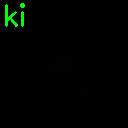

[INFO] ground truth label: ki, predicted label: ki


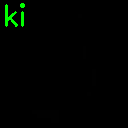

[INFO] ground truth label: ki, predicted label: ki


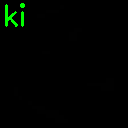

[INFO] ground truth label: ha, predicted label: ha


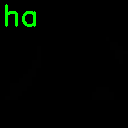

[INFO] ground truth label: tsu, predicted label: tsu


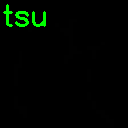

[INFO] ground truth label: ya, predicted label: ya


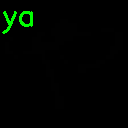

[INFO] ground truth label: tsu, predicted label: tsu


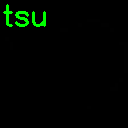

[INFO] ground truth label: na, predicted label: na


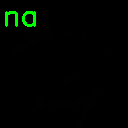

[INFO] ground truth label: ki, predicted label: ki


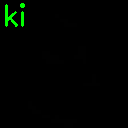

[INFO] ground truth label: tsu, predicted label: tsu


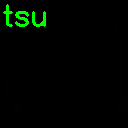

In [28]:
# switch off autograd
with torch.no_grad():
	# loop over the test set
	for (image, label) in testDataLoader:
		# grab the original image and ground truth label
		origImage = image.numpy().squeeze(axis=(0, 1))
		gtLabel = testData.dataset.classes[label.numpy()[0]]
		# send the input to the device and make predictions on it
		image = image.to(device)
		pred = model(image)
		# find the class label index with the largest corresponding
		# probability
		idx = pred.argmax(axis=1).cpu().numpy()[0]

		predLabel = testData.dataset.classes[idx]
		# convert the image from grayscale to RGB (so we can draw on
		# it) and resize it (so we can more easily see it on our
		# screen)
		origImage = np.dstack([origImage] * 3)
		origImage = imutils.resize(origImage, width=128)
		# draw the predicted class label on it
		color = (0, 255, 0) if gtLabel == predLabel else (0, 0, 255)
		cv2.putText(origImage, gtLabel, (2, 25),
			cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)
		# display the result in terminal and show the input image
		print("[INFO] ground truth label: {}, predicted label: {}".format(
			gtLabel, predLabel))
		cv2_imshow(origImage)
		cv2.waitKey(0)